In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet,SGDClassifier,SGDRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_absolute_error,confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostRegressor,AdaBoostClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from pandas.api.types import is_string_dtype,is_numeric_dtype
import joblib as joblib

In [2]:
df=pd.read_csv('Flight_Data.csv')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
#drop records having missing values
df=df.dropna()
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


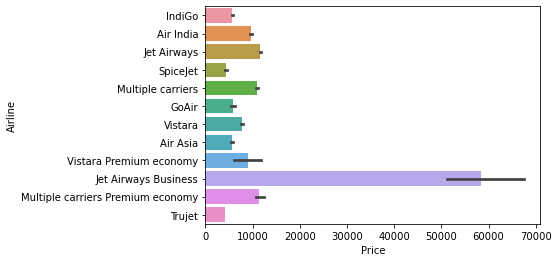

In [15]:
sns.barplot(data=df,y='Airline',x='Price')
#Jet Airways flight cost is high 

In [20]:
#replace h with . and m with blank of duration column 
df['Duration']=df['Duration'].str.replace('h','.')
df['Duration']=df['Duration'].str.replace(' ','')
df['Duration']=df['Duration'].str.replace('m','')
df

<ipython-input-20-65a40e9ece70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration']=df['Duration'].str.replace('h','.')
<ipython-input-20-65a40e9ece70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration']=df['Duration'].str.replace(' ','')
<ipython-input-20-65a40e9ece70>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2.50,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7.25,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.25,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4.45,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2.30,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2.35,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3.,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2.40,non-stop,No info,12648


In [23]:
df['Duration']=df['Duration'].astype(float)
df.dtypes

<ipython-input-23-40195ee5ee93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration']=df['Duration'].astype(float)


Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration           float64
Total_Stops         object
Additional_Info     object
Price                int64
dtype: object

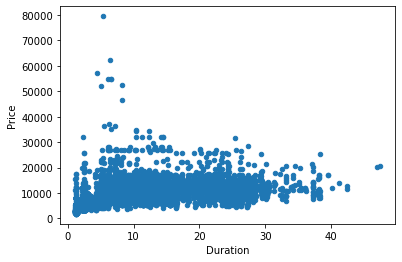

In [28]:
df.plot.scatter(x='Duration',y='Price')
#Price is almost same while duration is increasing

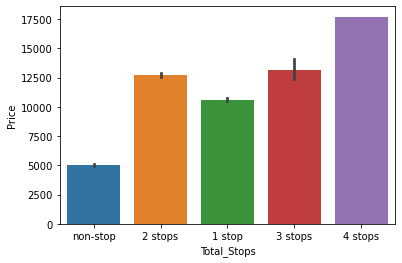

In [29]:
sns.barplot(data=df,x='Total_Stops',y='Price')
#flights having more stopage have higher ticket price

In [30]:
df.isin(['?']).sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [31]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [32]:
for col in df.columns:
    if(is_string_dtype(df[col])):
        labelEncoder=LabelEncoder()
        df[col]=labelEncoder.fit_transform(df[col])

<ipython-input-32-b85cfcfdb0b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=labelEncoder.fit_transform(df[col])


In [33]:
df.dtypes

Airline              int32
Date_of_Journey      int32
Source               int32
Destination          int32
Route                int32
Dep_Time             int32
Arrival_Time         int32
Duration           float64
Total_Stops          int32
Additional_Info      int32
Price                int64
dtype: object

In [34]:
df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,23.733758,1.952256,1.436154,74.820165,107.983898,869.846564,10.554873,1.458248,7.392998,9087.214567
std,2.352090,12.337569,1.177276,1.474845,36.729039,61.087537,331.519717,8.483141,1.806320,1.214254,4611.548810
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.150000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,48.000000,55.000000,603.000000,2.500000,0.000000,8.000000,5277.000000
50%,4.000000,24.000000,2.000000,1.000000,73.000000,96.000000,937.000000,8.400000,0.000000,8.000000,8372.000000
75%,4.000000,35.000000,3.000000,2.000000,104.000000,164.000000,1141.000000,15.300000,4.000000,8.000000,12373.000000
max,11.000000,43.000000,4.000000,5.000000,127.000000,221.000000,1342.000000,47.400000,4.000000,9.000000,79512.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B22F8E2FA0>,
      dtype=object)

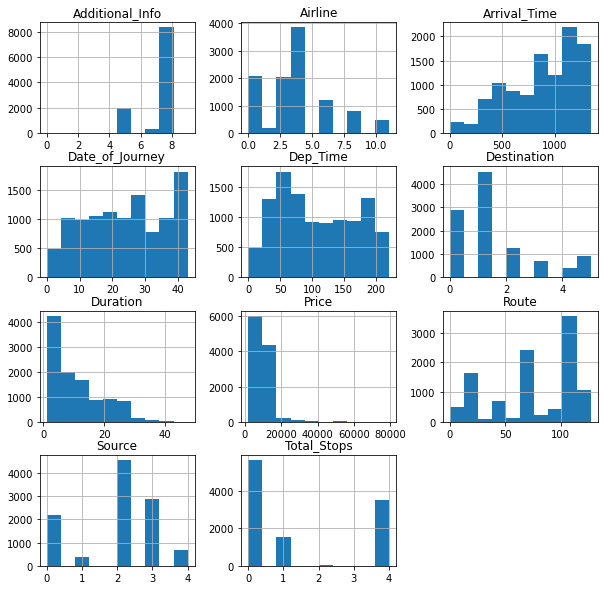

In [36]:
#Dep_Time,Arrival_Time,Price columns having skewed data.
#Outlier present in Airline,Dep_Time,Arrival_Time and Price column has outliers

df.hist(figsize=(10,10))

Airline               AxesSubplot(0.125,0.749828;0.227941x0.130172)
Date_of_Journey    AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Source             AxesSubplot(0.672059,0.749828;0.227941x0.130172)
Destination           AxesSubplot(0.125,0.593621;0.227941x0.130172)
Route              AxesSubplot(0.398529,0.593621;0.227941x0.130172)
Dep_Time           AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Arrival_Time          AxesSubplot(0.125,0.437414;0.227941x0.130172)
Duration           AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Total_Stops        AxesSubplot(0.672059,0.437414;0.227941x0.130172)
Additional_Info       AxesSubplot(0.125,0.281207;0.227941x0.130172)
Price              AxesSubplot(0.398529,0.281207;0.227941x0.130172)
dtype: object

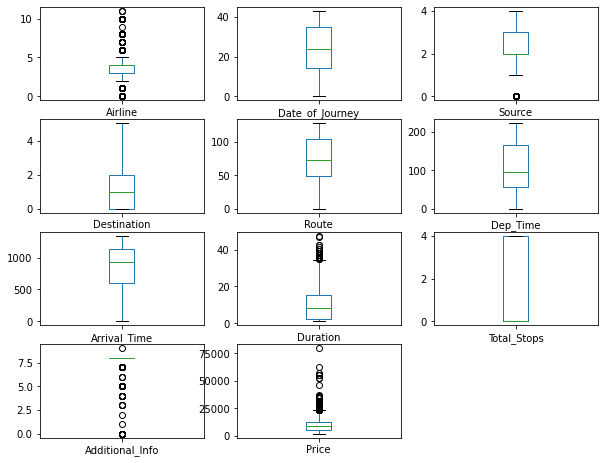

In [37]:
#Duration,Price,Arrival_Time column having skewed data .confirmed again from above graph
df.plot.box(subplots=True,figsize=(10,10),layout=(5,3))

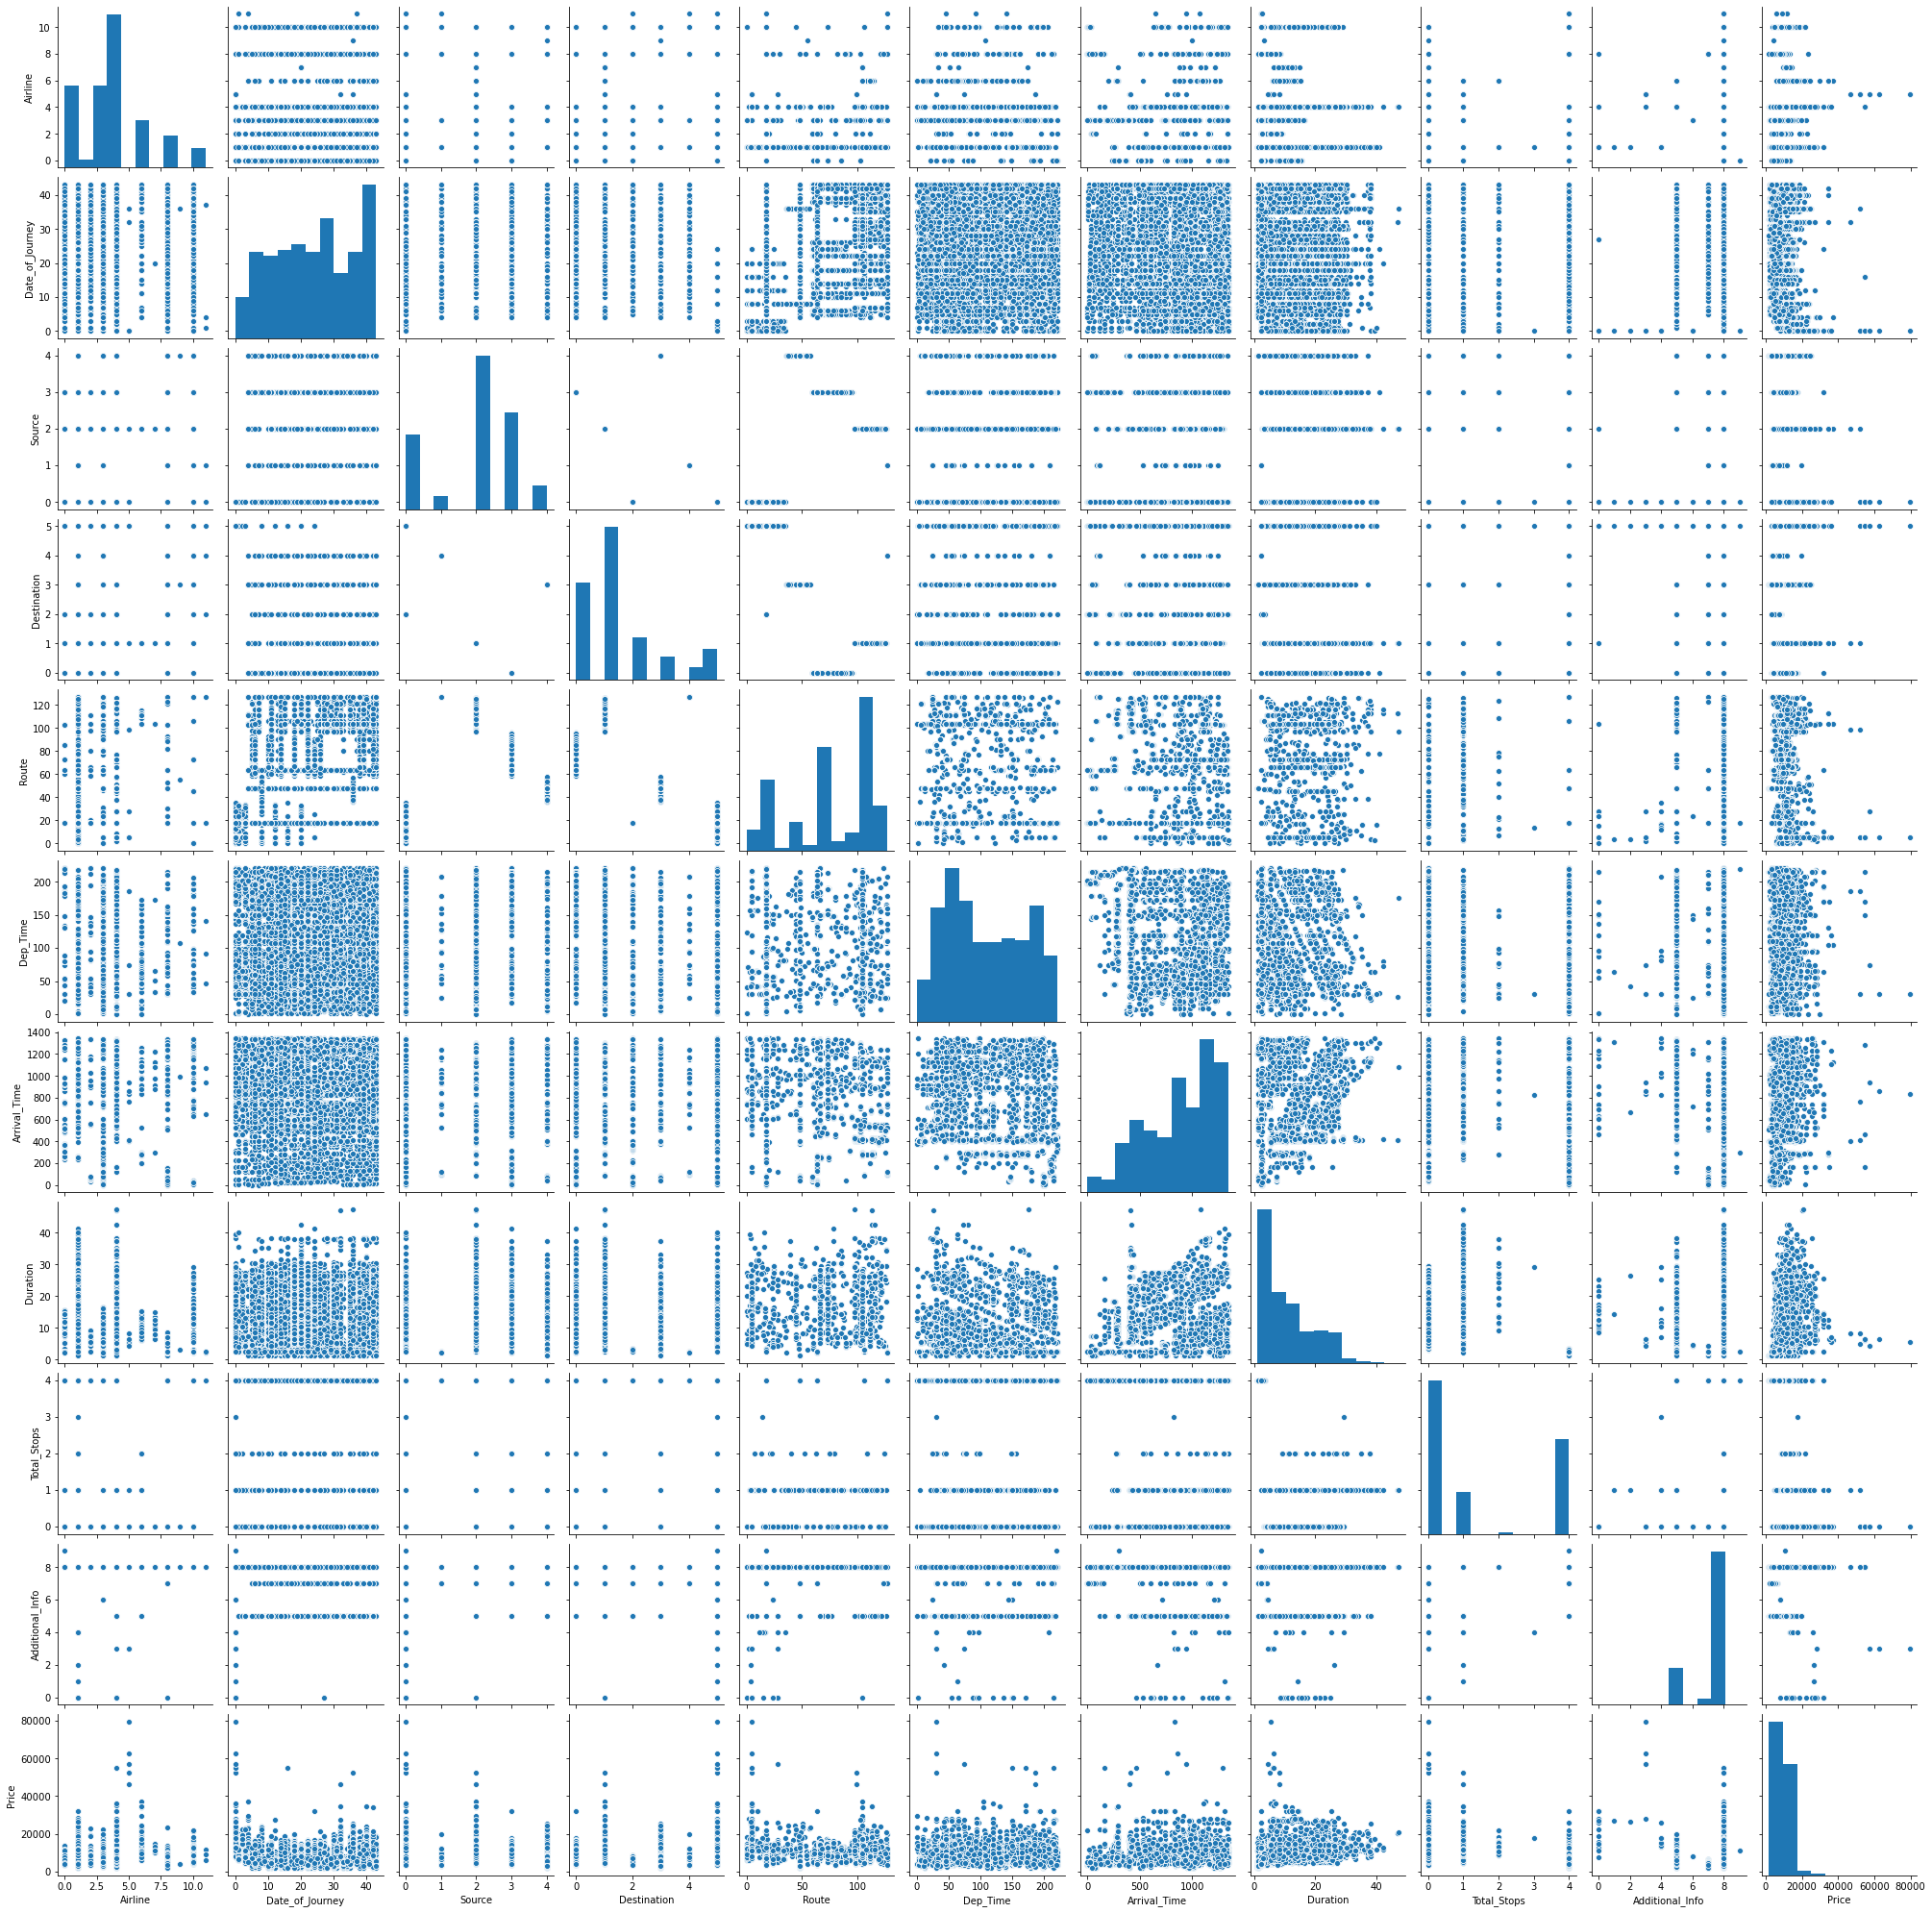

In [38]:
#Additional_Info,Price,Duration,Airline columns having outlier .confirmed from above boxplot
sns.pairplot(data=df)

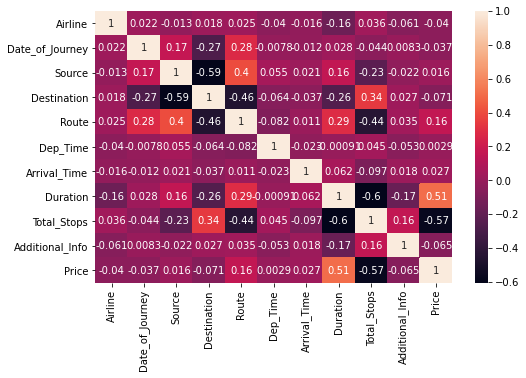

In [42]:
corr_=df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(data=corr_,annot=True)

In [43]:
#price strongly corelated with Total_Stops,Duration .
#remove skewness
df.skew()

Airline            0.731057
Date_of_Journey   -0.070718
Source            -0.424023
Destination        1.244046
Route             -0.501911
Dep_Time           0.194914
Arrival_Time      -0.606676
Duration           0.855125
Total_Stops        0.631532
Additional_Info   -1.779689
Price              1.812405
dtype: float64

In [44]:
#remove skewed data where skewness is > 0.55
for col in df.columns:
    if(df[col].skew()>0.55):
        df[col]=np.log1p(df[col])

<ipython-input-44-b101e18e6799>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=np.log1p(df[col])


In [45]:
df.skew()

Airline           -0.680164
Date_of_Journey   -0.070718
Source            -0.424023
Destination        0.283053
Route             -0.501911
Dep_Time           0.194914
Arrival_Time      -0.606676
Duration          -0.061149
Total_Stops        0.466329
Additional_Info   -1.779689
Price             -0.254592
dtype: float64

In [46]:
#remove outliers
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [47]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,1.386294,24,0,1.791759,18,211,233,1.252763,1.609438,8,8.268219
1,0.693147,6,3,0.000000,84,31,906,2.110213,0.693147,8,8.944159
2,1.609438,43,2,0.693147,118,70,413,2.995732,0.693147,8,9.538420
3,1.386294,10,3,0.000000,91,164,1324,1.832581,0.000000,8,8.735364
4,1.386294,0,0,1.791759,29,149,1237,1.695616,0.000000,8,9.495745
...,...,...,...,...,...,...,...,...,...,...,...
10678,0.000000,41,3,0.000000,64,183,1259,1.193922,1.609438,8,8.320692
10679,0.693147,29,3,0.000000,64,193,1305,1.208960,1.609438,8,8.329899
10680,1.609438,29,0,1.098612,18,58,824,1.386294,1.609438,8,8.885994
10681,2.397895,0,0,1.791759,18,92,938,1.223775,1.609438,8,9.445333


In [48]:
x=df.drop(['Price'],axis=1)
y=df['Price']

In [49]:
standardScaler=StandardScaler()
x=standardScaler.fit_transform(x)
x

array([[-0.17371833,  0.01700224, -1.66632633, ..., -1.11959386,
         1.35099721,  0.50585839],
       [-1.48410799, -1.44668693,  0.88759372, ..., -0.04907715,
         0.08588356,  0.50585839],
       [ 0.24813291,  1.56200748,  0.03628704, ...,  1.05648318,
         0.08588356,  0.50585839],
       ...,
       [ 0.24813291,  0.42358257, -1.66632633, ..., -0.95288146,
         1.35099721,  0.50585839],
       [ 1.73870577, -1.93458332, -1.66632633, ..., -1.15578446,
         1.35099721,  0.50585839],
       [-1.48410799,  1.48069142,  0.03628704, ...,  0.08699596,
         0.08588356,  0.50585839]])

In [50]:
lr_reg=LinearRegression()
lasso=Lasso()
ridge=Ridge()
svr=SVR()
dtree_reg=DecisionTreeRegressor()
kn_reg=KNeighborsRegressor()
sgd_reg=SGDRegressor()
gradient_reg=GradientBoostingRegressor()
ada_reg=AdaBoostRegressor()
rand_reg=RandomForestRegressor()

In [51]:
models=[]
models.append(('LinearRegression',lr_reg))
models.append(('SVR',svr))
models.append(('DecisionTreeRegressor',dtree_reg))
models.append(('KNeighborsRegressor',kn_reg))
models.append(('SGDRegressor',sgd_reg))
models.append(('Gradient Boost Regressor',gradient_reg))
models.append(('Ada Boost Regressor',ada_reg ))
models.append(('RandomForestRegressor',rand_reg))

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [53]:
#finding and storing matrix model wise
cross_val_list=[]
mse_list=[]
model_name_list=[]
mae_list=[]
r2_score_list=[]
score_list=[]

for reg_name,reg_obj in models:
    reg_obj.fit(x_train,y_train)
    y_pred=reg_obj.predict(x_test)
    cross_val_list.append(cross_val_score(reg_obj,x,y,cv=10,scoring='r2').mean())
    r2_score_list.append(r2_score(y_test,y_pred))
    mse_list.append(mean_squared_error(y_test,y_pred))
    mae_list.append(mean_absolute_error(y_test,y_pred))
    score_list.append(reg_obj.score(x_train,y_train))
    model_name_list.append(reg_name)
    

In [54]:
df_matrix=pd.DataFrame({'Estimator_Name':model_name_list,'cross_val_Score':cross_val_list,'r2_score':r2_score_list,'mse':mse_list,'mae':mae_list,'train_score':score_list})
df_matrix

,Estimator_Name,cross_val_Score,r2_score,mse,mae,train_score
0,LinearRegression,0.566550,0.559194,0.116832,0.273982,0.569906
1,SVR,0.785231,0.778618,0.058676,0.170742,0.797992
2,DecisionTreeRegressor,0.872291,0.866252,0.035449,0.100137,0.996969
3,KNeighborsRegressor,0.816941,0.811549,0.049948,0.152953,0.881548
4,SGDRegressor,0.564987,0.557770,0.117210,0.273759,0.569166
5,Gradient Boost Regressor,0.859603,0.858057,0.037621,0.141810,0.867511
6,Ada Boost Regressor,0.669132,0.664704,0.088868,0.248729,0.666497
7,RandomForestRegressor,0.919651,0.913336,0.022970,0.090875,0.986674


In [56]:
#Random Forest Regressor performing good ..
joblib.dump(rand_reg,'Flight_Ticket_Prediction.pkl')

['Flight_Ticket_Prediction.pkl']